# Activity 5 - Other Model Types with Linear Regression
We have tried a standard linear model as well as a dummy variable.  Experiment with a few other functions such as the parabolic to try and get a better fit for the data.  For each function you try make sure you print the function parameters, $r^2$ value and plot the trendline against the original and moving average data.

Try a few different functions, experiment with the data and see how good your predictions can get.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
# Loading the data from activity 1
df = pd.read_csv('activity2_measurements.csv')
df_first_year = pd.read_csv('activity_first_year.csv')
rolling = pd.read_csv('activity2_rolling.csv')
window = 20

# Trendline values
trend_x = np.array([
    1,
    182.5,
    365
])

Using a sine curve function as the basis of the model

In [2]:
# Using a sine curve
df_first_year['DayOfYear2'] = np.sin(df_first_year['DayOfYear'] / df_first_year['DayOfYear'].max())
df_first_year.head()

,Date,TempAvgF,Year,Month,DayOfYear,inflection,DayOfYear2
0,2013-12-21,60,2013,12,1,1,0.002740
1,2013-12-22,48,2013,12,2,1,0.005479
2,2013-12-23,45,2013,12,3,1,0.008219
3,2013-12-24,46,2013,12,4,1,0.010959
4,2013-12-25,50,2013,12,5,1,0.013698


In [3]:
# Note the year values need to be provided as an N x 1 array
model = LinearRegression()
model.fit(df_first_year[['DayOfYear2', 'DayOfYear']], df_first_year.TempAvgF)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Print the parameters of the model

In [4]:
print(f'a = {model.coef_[0]}')
print(f'm = {model.coef_[1]}')
print(f'c = {model.intercept_}')

print('\nModel Definition')
print(f'y = {model.coef_[0]:0.4}x^2 + {model.coef_[1]:0.4}x + {model.intercept_:0.4f}')

a = 634.322313570282
m = -1.4371290614190075
c = 39.93286585807408

Model Definition
y = 634.3x^2 + -1.437x + 39.9329


In [5]:
# Note the year values need to be provided as an N x 1 array
r2 = model.score(df_first_year[['DayOfYear2', 'DayOfYear']], df_first_year.TempAvgF)
print(f'r2 score = {r2:0.4f}')

r2 score = 0.7047


In [6]:
trend_y = model.predict(df_first_year[['DayOfYear2', 'DayOfYear']].values)
trend_y

array([40.23360397, 40.53432905, 40.83502803, 41.13568788, 41.43629555,
       41.736838  , 42.03730219, 42.33767507, 42.6379436 , 42.93809474,
       43.23811546, 43.5379927 , 43.83771344, 44.13726463, 44.43663324,
       44.73580624, 45.03477059, 45.33351327, 45.63202123, 45.93028146,
       46.22828093, 46.52600661, 46.82344549, 47.12058453, 47.41741073,
       47.71391108, 48.01007254, 48.30588213, 48.60132682, 48.89639362,
       49.19106952, 49.48534153, 49.77919664, 50.07262186, 50.36560421,
       50.6581307 , 50.95018834, 51.24176416, 51.53284517, 51.82341842,
       52.11347092, 52.40298972, 52.69196186, 52.98037437, 53.26821431,
       53.55546872, 53.84212468, 54.12816922, 54.41358943, 54.69837238,
       54.98250513, 55.26597476, 55.54876837, 55.83087305, 56.11227588,
       56.39296396, 56.67292442, 56.95214435, 57.23061087, 57.5083111 ,
       57.78523218, 58.06136124, 58.33668542, 58.61119186, 58.88486771,
       59.15770014, 59.42967631, 59.70078339, 59.97100856, 60.24

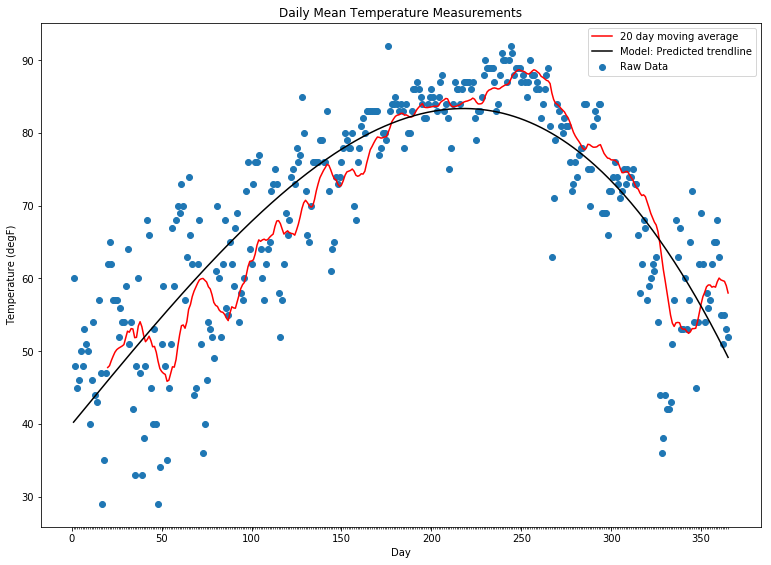

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_first_year.DayOfYear, df_first_year.TempAvgF, label='Raw Data');
ax.plot(df_first_year.DayOfYear, rolling, c='r', label=f'{window} day moving average');
ax.plot(df_first_year.DayOfYear, trend_y, c='k', label='Model: Predicted trendline')

ax.set_title('Daily Mean Temperature Measurements')
ax.set_xlabel('Day')
ax.set_ylabel('Temperature (degF)')
ax.set_xticks(range(1, 366), 10)
ax.legend();